In [ ]:
#general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras

#set seed for reproducibility
seed=42
#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

df=pd.read_csv('/content/tweet_sentiment.csv')

df.head()

,cleaned_tweets,sentiment
0,video offic mind busi david solomon tell gs in...,0
1,price lumber lb f sinc hit ytd high maci turna...,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict ...,1
4,satellit avoid attack space junk circl earth paid,-1


In [ ]:
rename = {"cleaned_tweets": "statement", "sentiment": "sentiment"}
df.rename(columns = rename, inplace=True)

In [ ]:
df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21995 entries, 0 to 28435
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  21994 non-null  object
 1   sentiment  21995 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 515.5+ KB


In [ ]:
df['sentiment'].replace({-1: 'negatif', 0: 'netral', 1: 'positif'}, inplace=True)

df.head()

,statement,sentiment
0,video offic mind busi david solomon tell gs in...,netral
1,price lumber lb f sinc hit ytd high maci turna...,netral
2,say american dream dead,negatif
3,barri silbert extrem optimist bitcoin predict ...,positif
4,satellit avoid attack space junk circl earth paid,negatif


In [ ]:
df.describe()

,statement,sentiment
count,21994,21995
unique,21994,3
top,video offic mind busi david solomon tell gs in...,netral
freq,1,13129


In [ ]:
train,eva = train_test_split(df,test_size = 0.2)

In [ ]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st=='positif'):
        return 0
    elif(st=='netral'):
        return 2
    else:
        return 1

train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(17596, 3)


In [ ]:
train_df = pd.DataFrame({
    'text': train['statement'][:14076].replace(r'\n', ' ', regex=True),
    'label': train['label'][:14076]
})

eval_df = pd.DataFrame({
    'text': eva['statement'][-3519:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-3519:]
})

In [ ]:
!pip install simpletransformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 86.8 

In [ ]:
from simpletransformers.classification import ClassificationModel


In [ ]:
# Inisialisasi model
model = ClassificationModel('roberta', 'roberta-base', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True}, use_cuda=False)

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
model.train_model(train_df)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:611: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/14076 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1760 [00:00<?, ?it/s]

(1760, 0.36383914776458615)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3519 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/440 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.9129091195885123, 'eval_loss': 0.2203535619583404}

In [ ]:
model_outputs

array([[ 4.54387665, -2.70964026, -2.40567446],
       [-1.30658054, -2.78785849,  3.83962226],
       [-1.36563051, -2.69255471,  3.84439683],
       ...,
       [-1.3499949 , -2.72671771,  3.83846259],
       [-0.65486717, -3.04258847,  3.43453336],
       [ 4.27789879, -2.49262691, -2.393543  ]])

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = eval_df['label'].tolist()
predicted = lst

In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 996,    7,   77],
       [   3,  327,   34],
       [  28,   18, 2029]])

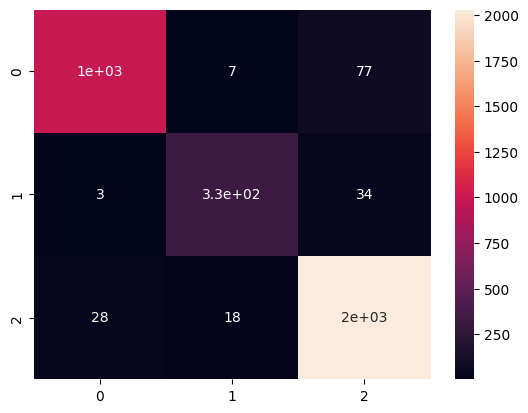

In [ ]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['positif','netral','negatif']))

              precision    recall  f1-score   support

     positif       0.97      0.92      0.95      1080
      netral       0.93      0.90      0.91       364
     negatif       0.95      0.98      0.96      2075

    accuracy                           0.95      3519
   macro avg       0.95      0.93      0.94      3519
weighted avg       0.95      0.95      0.95      3519



In [ ]:
print(sklearn.metrics.accuracy_score(true,predicted))

0.9525433361750497
